In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data and Use Relevant Cols

In [2]:
df = pd.read_csv('../../../data/processed_data/df_matching.csv')
df.head()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated
0,AL,Autauga County,2011,0.740,0.089,0.554,50354.0,51622.0,64.658333,3.769167,2.0,4.1,21.7,0,0,0,0,1,0,0
1,AL,Baldwin County,2011,0.681,0.088,0.615,6076.0,51957.0,67.733333,3.720833,3.0,4.1,18.2,0,0,1,0,1,0,0
2,AL,Calhoun County,2011,0.689,0.101,0.499,9452.0,39997.0,62.325000,4.231667,3.0,4.8,14.4,0,0,0,0,0,0,0
3,AL,Cullman County,2011,0.684,0.094,0.460,20380.0,39276.0,61.333333,5.382500,4.0,4.8,17.4,0,0,0,0,0,0,0
4,AL,Etowah County,2011,0.702,0.105,0.561,10344.0,37264.0,62.100000,4.965000,3.0,4.4,24.0,0,0,0,0,0,0,0


In [29]:
locations = list(range(3, 11))

In [30]:
cor = df.corr()
cor.iloc[locations, locations]

,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,RUCC,Poor mental health days raw value,Crude Rate
Some college raw value,1.000000,-0.293784,0.625786,-0.257692,-0.071437,-0.402076,-0.482406,-0.319640
Ratio of population to mental health providers,-0.293784,1.000000,-0.166140,0.123440,-0.005733,0.059733,0.103573,0.084384
Median household income raw value,0.625786,-0.166140,1.000000,-0.163650,-0.078292,-0.476416,-0.498450,-0.340603
Average Temperature,-0.257692,0.123440,-0.163650,1.000000,0.168921,-0.194946,0.211751,-0.112829
Average Precipitation,-0.071437,-0.005733,-0.078292,0.168921,1.000000,-0.024316,0.146356,-0.032800
RUCC,-0.402076,0.059733,-0.476416,-0.194946,-0.024316,1.000000,0.214069,0.586063
Poor mental health days raw value,-0.482406,0.103573,-0.498450,0.211751,0.146356,0.214069,1.000000,0.254278
Crude Rate,-0.319640,0.084384,-0.340603,-0.112829,-0.032800,0.586063,0.254278,1.000000


Influence poor mental health days: 'Some college raw value', 'Median household income raw value'

In [31]:
df['college_and_income_treated'] = df['household_income_treated'] & df['college_treated']
df.groupby('college_and_income_treated').count()

,State Abbreviation,Name,Release Year,High school graduation raw value,Unemployment raw value,Some college raw value,Ratio of population to mental health providers,Median household income raw value,Average Temperature,Average Precipitation,...,Poor mental health days raw value,Crude Rate,high_school_treated,unemployment_treated,college_treated,mental_health_provider_treated,household_income_treated,temperature_treated,precipitation_treated,pscore
college_and_income_treated,,,,,,,,,,,,,,,,,,,,,
0,2851,2851,2851,2842,2851,2851,2851,2851,2851,2851,...,2851,2851,2851,2851,2851,2851,2851,2851,2851,2851
1,1611,1611,1611,1599,1611,1611,1611,1611,1611,1611,...,1611,1611,1611,1611,1611,1611,1611,1611,1611,1611


## Step 2: Identify Col needed and examine relationship with covariates

In [32]:
categorize_treatment = 'college_and_income_treated'

<AxesSubplot:xlabel='High school graduation raw value', ylabel='Count'>

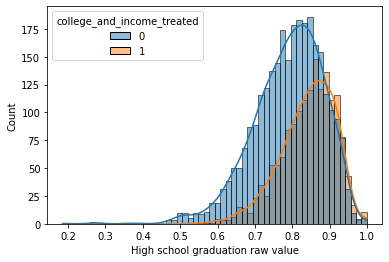

In [33]:
sns.histplot(data=df, x="High school graduation raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Some college raw value', ylabel='Count'>

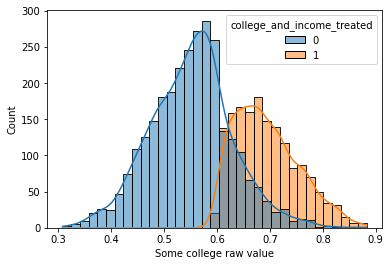

In [34]:
sns.histplot(data=df, x="Some college raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Count'>

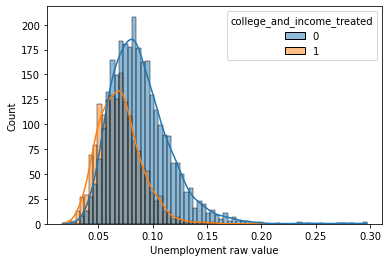

In [35]:
sns.histplot(data=df, x="Unemployment raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Median household income raw value', ylabel='Count'>

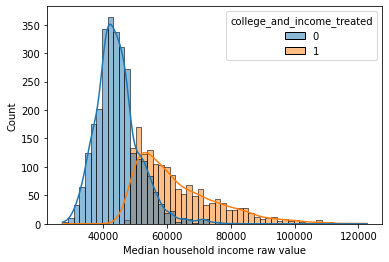

In [36]:
sns.histplot(data=df, x="Median household income raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Poor mental health days raw value', ylabel='Count'>

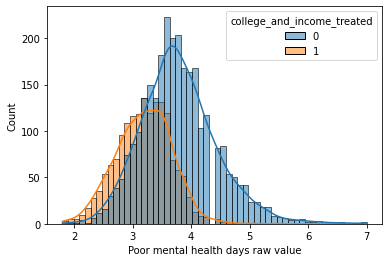

In [37]:
sns.histplot(data=df, x="Poor mental health days raw value", hue=categorize_treatment, kde=True)

<AxesSubplot:xlabel='Crude Rate', ylabel='Count'>

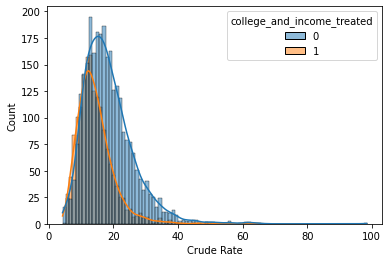

In [38]:
sns.histplot(data=df, x="Crude Rate", hue=categorize_treatment, kde=True)

Counties with higher income than median have higher high school and college rates, lower unemployment rate, lower poor mental health days, and lower rate of suicide.

## Remove Null mental health days raw Value

In [39]:
null_vals = df['Poor mental health days raw value'].isna()
df_crude = df.copy()
df = df[~null_vals] # Store rows without null values

# Linear Regressions
Q2: What are the estimated ATE specifications?

In [40]:
def OLS_estimate(outcome, covariates):
    covariates = sm.add_constant(covariates) # adding a constant 
    model = sm.OLS(outcome, covariates)
    result = model.fit()
    print(result.summary())

In [41]:
# Unemployment only
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.200
Model:                                           OLS   Adj. R-squared:                  0.200
Method:                                Least Squares   F-statistic:                     558.7
Date:                               Mon, 06 Dec 2021   Prob (F-statistic):          3.13e-217
Time:                                       10:02:29   Log-Likelihood:                -3966.3
No. Observations:                               4462   AIC:                             7939.
Df Residuals:                                   4459   BIC:                             7958.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
                                 coef    std err          t 

In [42]:
# Unemployment only + mental health providers
outcome = df['Poor mental health days raw value']
covariates = df[[categorize_treatment, 'Unemployment raw value', 'Ratio of population to mental health providers']]
OLS_estimate(outcome, covariates)

                                    OLS Regression Results                                   
Dep. Variable:     Poor mental health days raw value   R-squared:                       0.200
Model:                                           OLS   Adj. R-squared:                  0.200
Method:                                Least Squares   F-statistic:                     372.4
Date:                               Mon, 06 Dec 2021   Prob (F-statistic):          8.30e-216
Time:                                       10:02:29   Log-Likelihood:                -3966.3
No. Observations:                               4462   AIC:                             7941.
Df Residuals:                                   4458   BIC:                             7966.
Df Model:                                          3                                         
Covariance Type:                           nonrobust                                         
                                                     coef   

Conclusion: it seems like high school graduation, college graduation, and unemployment are all covariates, but college graduation seems to help the most.

## Propensity Score Matching

In [43]:
only_treated = (df["household_income_treated"] == 1)
only_untreated = (df["household_income_treated"] == 0)

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Some college raw value'>

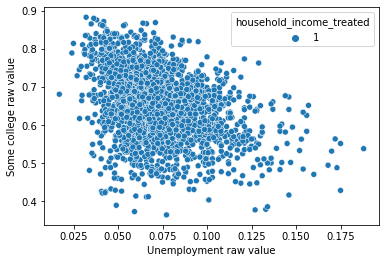

In [44]:
sns.scatterplot(data=df[only_treated], x = "Unemployment raw value", y = "Some college raw value", hue = "household_income_treated")

<AxesSubplot:xlabel='Unemployment raw value', ylabel='Some college raw value'>

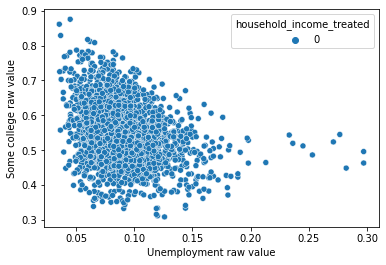

In [88]:
sns.scatterplot(data=df[only_untreated], x = "Unemployment raw value", y = "Some college raw value", hue = "household_income_treated")

In [138]:
df.loc[only_treated, "RUCC"].describe()

count    2232.000000
mean        1.901434
std         1.225809
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: RUCC, dtype: float64

In [139]:
df.loc[only_untreated, "RUCC"].describe()

count    2230.000000
mean        3.140807
std         1.543418
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: RUCC, dtype: float64

### Only use unemployment above 0.05 and college below 0.7 and RUCC above 2

In [176]:
print(df["Unemployment raw value"].quantile(0.1)) # exclude best 10%
print(df["Some college raw value"].quantile(0.85)) # 90% below
print(df["RUCC"].quantile(0.32)) # exclude 32% below

0.05197176553
0.708073734695
2.0


In [177]:
college_filter = (df["Some college raw value"] <= df["Some college raw value"].quantile(0.85))
rucc_above2 = (df["RUCC"] > df["RUCC"].quantile(0.32))

In [194]:
legal = (df["Unemployment raw value"] >= (df["Unemployment raw value"].quantile(0.1))) & rucc_above2
df_trimmed = df[legal] 

Optimization terminated successfully.
         Current function value: 0.582459
         Iterations 7


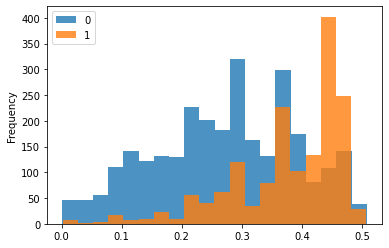

In [19]:
def gen_pscore(data, outcome, covariates):
    model = sm.Logit(outcome, covariates)
    result = model.fit()
    data['pscore'] = result.predict(covariates)
    data.groupby([categorize_treatment]).pscore.plot(kind='hist', bins=20, alpha=0.8, legend=True)

gen_pscore(df, df[categorize_treatment], df[['Unemployment raw value', 'RUCC', 'Ratio of population to mental health providers']] )

In [21]:
df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
college_and_income_treated,,,,,,,,
0,2851.0,0.273401,0.117575,0.001388,0.188064,0.282405,0.369304,0.507792
1,1611.0,0.378343,0.092836,0.001817,0.336326,0.409574,0.449912,0.506985


### Perform nearest-neighbor matching

In [24]:
def trim(data):
    control_data = data[data[categorize_treatment] == 0]
    treat_data = data[data[categorize_treatment] == 1]

    min_control, min_treat = control_data.pscore.min(), treat_data.pscore.min()
    max_control, max_treat = control_data.pscore.max(), treat_data.pscore.max()

    min_support = max(min_control, min_treat)
    max_support = min(max_control, max_treat)

    trim_data = data.loc[((data.pscore >= min_support) & (data.pscore <= max_support)),:]

    return trim_data

trim_df = trim(df)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
college_and_income_treated,,,,,,,,
0,2849.0,0.273414,0.117424,0.002556,0.188072,0.282405,0.369294,0.504383
1,1611.0,0.378343,0.092836,0.001817,0.336326,0.409574,0.449912,0.506985


In [25]:
def Nearest_Neighbor_Pair(treated_df, non_treated_df):
    treated_x = treated_df['pscore'].values
    non_treated_x = non_treated_df['pscore'].values

    nbrs = NearestNeighbors(n_neighbors=1).fit(np.expand_dims(non_treated_x, axis= 1))
    distances, indices = nbrs.kneighbors(np.expand_dims(treated_x, axis= 1))
    indices = indices.reshape(indices.shape[0])
    matched = non_treated_df.iloc[indices]
    return matched

treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.524


### Examine if the distributions for covariates are balanced

Compute smd  
source code: http://ethen8181.github.io/machine-learning/ab_tests/causal_inference/matching.html

In [26]:
def compute_smd(covariates_table: pd.DataFrame, covariates: list, round_digits: int=4) -> pd.DataFrame:
    covariates_smds = []
    for var in covariates:
        covariates_values = covariates_table[var].values
        neg_mean = covariates_values[0, 0]
        neg_std = covariates_values[0, 1]
        pos_mean = covariates_values[1, 0]
        pos_std = covariates_values[1, 1]

        smd = (pos_mean - neg_mean) / np.sqrt((pos_std ** 2 + neg_std ** 2) / 2)
        smd = round(abs(smd), round_digits)
        covariates_smds.append(smd)

    return pd.DataFrame({'features': covariates, 'smd': covariates_smds})

In [27]:
covariates_list = ['Unemployment raw value', 'Some college raw value', 'RUCC']
agg_operations = {categorize_treatment: 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

college_and_income_treated Unemployment raw value  \
                                                count                   mean   
college_and_income_treated                                                     
0                                                1611               0.087274   
1                                                1611               0.069275   

                                     Some college raw value            \
                                 std                   mean       std   
college_and_income_treated                                              
0                           0.029271               0.571073  0.070051   
1                           0.019613               0.693250  0.060167   

                                RUCC            
                                mean       std  
college_and_income_treated                      
0                           1.821229  1.093889  
1                           1.753569  1.121547

In [28]:
# standardize mean difference, <= 0.25
# Put both variables in there, unemployment/education balanced
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                 features     smd
0  Unemployment raw value  0.7224
1  Some college raw value  1.8711
2                    RUCC  0.0611


#### Since both rmds are smaller than 0.25, the distribution of unemployment rates and college grad rates is not too different between the two groups.

### stratification matching

In [43]:
def stratified_matching(data):
  mybins = np.arange(0.0, 1.1, 0.1)
  mylabels = np.arange(1, 11)
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)

  # calculate the weights for each strata
  strata_w = data[data[categorize_treatment] == 1].groupby('strata').size()/data[data[categorize_treatment] == 1].groupby('strata').size().sum()
  
  # calculate the ATT for each strata
  strata_ate = data[data[categorize_treatment] == 1].groupby('strata')['Poor mental health days raw value'].mean() - data[data[categorize_treatment] == 0].groupby('strata')['Poor mental health days raw value'].mean()

  # stratefied matching estimate 
  stratefied_ate = (strata_w * strata_ate).sum()  
  print("The stratification matching estimate is {}".format(round(stratefied_ate, 3))) 
  
stratified_matching(trim_df)

The stratification matching estimate is -0.375


C:\Users\alnli\AppData\Local\Temp/ipykernel_17964/2573337602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


### Inverse Probability Weighted Matching (IPW)

In [44]:
def IPW_estimator(data, T, Y, P):
  ITT = (data[T] * data[Y])/data[P] - ((1 - data[T])* data[Y])/(1 - data[P])
  IPWE = ITT.mean()
  return IPWE 

round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

0.053

# On Unemployment raw value only

Optimization terminated successfully.
         Current function value: 0.688663
         Iterations 4


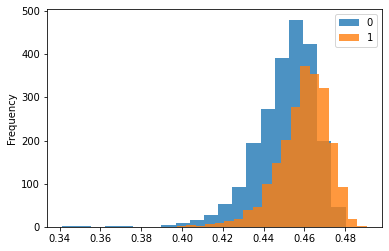

In [100]:
gen_pscore(df, df[categorize_treatment], df['Unemployment raw value'] )

In [101]:
trim_df = trim(df)
trim_df.groupby([categorize_treatment]).pscore.describe()

,count,mean,std,min,25%,50%,75%,max
income_treated,,,,,,,,
0,2205.0,0.451107,0.013810,0.400071,0.443234,0.453090,0.461174,0.480275
1,2181.0,0.459065,0.012164,0.397417,0.452542,0.460782,0.467848,0.480270


In [106]:
# Nearest neighbor
treated = trim_df[trim_df[categorize_treatment] == 1]
non_treated = trim_df[trim_df[categorize_treatment] == 0]
matched_df = Nearest_Neighbor_Pair(treated, non_treated)
ATE = np.mean(treated['Poor mental health days raw value'].values - matched_df['Poor mental health days raw value'].values)
print('ATE from Nearest Neighbors Matching = {}'.format(round(ATE, 3)))

ATE from Nearest Neighbors Matching = -0.444


Compute smd

In [104]:
covariates_list = ['Unemployment raw value', 'Some college raw value']
agg_operations = {categorize_treatment: 'count'}
agg_operations.update({
    covariate: ['mean', 'std'] for covariate in covariates_list
})

# Combine treated and matched_df
covariates_table = pd.concat([treated, matched_df]).groupby(categorize_treatment).agg(agg_operations)
covariates_table.head()

income_treated Unemployment raw value            \
                        count                   mean       std   
income_treated                                                   
0                        2181               0.074168  0.022182   
1                        2181               0.074170  0.022190   

               Some college raw value            
                                 mean       std  
income_treated                                   
0                            0.562314  0.094831  
1                            0.650129  0.086419

In [105]:
# standardize mean difference, <= 0.25
# Put both variables in there, unemployment/education balanced
covariates_smd = compute_smd(covariates_table, covariates_list)
print(covariates_smd)

                 features     smd
0  Unemployment raw value  0.0001
1  Some college raw value  0.9679


In [107]:
# Stratified
stratified_matching(trim_df)

The stratification matching estimate is -0.571


C:\Users\alnli\AppData\Local\Temp/ipykernel_1448/2573337602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['strata'] = pd.cut(data['pscore'], bins = mybins, labels = mylabels)


In [108]:
round(IPW_estimator(trim_df, categorize_treatment, 'Poor mental health days raw value' , 'pscore'), 3)

0.032